# Computing Green functions with Moosh

To be honest, what is computed here is only the field generated by a linear current which is spatially invariant in the direction perpendicular to the plane. Of course, you need a few libraries:

In [1]:
import numpy as np
import PyMoosh as pm
import matplotlib.pyplot as plt
print("PyMoosh version: ", pm.__version__)

PyMoosh version:  3.1


We need to set up the structure. Here, we take a simple layer of a material that is slightly absorbent (hence the small imaginary part of the permittivity), in air. Importantly, the layer is divided in two, artificially: as we want to put the source exactly in the middle of the layer, we have a first layer of this material with a thickness of 500 nm, and a second one just below. 

In [2]:
wavelength = 800
green = pm.Structure([1,4+0.1j],[0,1,1,0],[2000,500,500,2000])

List of materials:
Simple, non dispersive: epsilon= 1
Simple, non dispersive: epsilon= (4+0.1j)


Now we define the simulation window, with a width of 30 times the wavelength. The source being punctual, it is located here exactly in the middle of the simulation window. We put a pixel every 3 nm, vertically as well as horizontally.

In [3]:
window = pm.Window(30*wavelength,0.5,3.,3.)

Pixels horizontally: 8000


Now we call the function that computes the Green function. We need to specify where the source is located vertically by giving the interface on which it is. This interface has to be artifically put between two layers of the same material, exactly as we have done above when we have created the structure. The number of the interface here is 2. It corresponds to the interface between layer 1 and 2 in the array `[2000,500,500,2000]`.

In [4]:
source_interface = 2
En = pm.green(green,window,wavelength,source_interface)


Pixels vertically: 1664


Now you can simply represent the result. Here we consider the real part of the field to be able to see the wavefronts. The window being periodic, it is not a good idea to put the source in a lossless material: light will go out on one edge of the simulation window and enter from the other side, whereas here, the losses are sufficient to hinder light from reaching the edges of the simulation window.

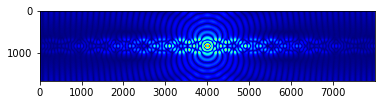

In [5]:
plt.imshow(abs(np.real(En)),cmap='jet')
#plt.colorbar()
